In [18]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation


import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


# Step 1: Loading Dataset

In [19]:
# Dataset Source: Kaggle
# Link: https://www.kaggle.com/datasets/chitrakumari25/smart-agricultural-production-optimizing-engine

In [20]:
df = pd.read_csv('Data/crop_recommendation.csv')

# Removing leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Replace multiple spaces with a single space in all column names
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  


# Step 2: Overview of Dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [22]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Step 3: EDA - Missing Values Analysis 

## Step 3)i): EDA - Show Missing Values in each Column

In [23]:
# Get percentage of null values in each column
null_values_percentage = df.isnull().mean().round(4).mul(100).sort_values(ascending=False)
print('-' * 44)
print("Percentage(%) of null values in each column")
print('-' * 44)
print(null_values_percentage)
print('\n')

# Get total null values in each column
total_null_values = df.isnull().sum().sort_values(ascending=False)
print('-' * 33)
print("Total null values in each column")
print('-' * 33)
print(total_null_values)

--------------------------------------------
Percentage(%) of null values in each column
--------------------------------------------
N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64


---------------------------------
Total null values in each column
---------------------------------
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


# Step 4: EDA - Duplicate Values Analysis 

## Step 4)i): EDA - Show Duplicate Values Rows

In [24]:
# Get percentage of duplicate rows
total_rows = len(df)
duplicate_rows = df.duplicated().sum()
duplicate_percentage = (duplicate_rows / total_rows) * 100

print('-' * 48)
print("Percentage(%) of duplicate rows in the DataFrame")
print('-' * 48)
print(f"{duplicate_percentage:.2f}%")
print('\n')

# Get total number of duplicate rows
print('-' * 30)
print("Total number of duplicate rows")
print('-' * 30)
print(duplicate_rows)


------------------------------------------------
Percentage(%) of duplicate rows in the DataFrame
------------------------------------------------
0.00%


------------------------------
Total number of duplicate rows
------------------------------
0


# Step 5: EDA - Analyzing Column

## Step 5)i): EDA - Univariate Analysis

In [25]:
def univariate_analysis_plotly(df):
    """

    Perform univariate analysis on a DataFrame using Plotly.

    Parameters:
    - df: DataFrame to be analyzed.

    Returns:
    - Interactive Plotly plots with summary statistics in the legend.
    """
    colors = px.colors.qualitative.Plotly

    for idx, column in enumerate(df.columns):

        # Generate descriptive statistics
        stats = df[column].describe()
        stats_str = '<br>'.join([f'{k}: {v:.2f}' if isinstance(v, (float, int)) else f'{k}: {v}' for k, v in stats.items()])

        # Visualization based on datatype
        if np.issubdtype(df[column].dtype, np.number):

            # If the column is numeric, plot a histogram with a box plot as marginal
            fig = px.histogram(df, x=column, marginal="box", title=f"Histogram for {column}", color_discrete_sequence=[colors[idx % len(colors)]])
        else:

            # If the column is categorical or textual, plot a bar chart
            value_counts = df[column].value_counts()

            fig = px.bar(x=value_counts.index, y=value_counts.values, 
                         title=f"Bar Chart for {column}", 
                         labels={"x": column, "y": "Count"},
                         color_discrete_sequence=[colors[idx % len(colors)]])

        # Add descriptive stats as a legend using a dummy trace for both types of columns
        fig.add_trace(go.Scatter(x=[None], y=[None], mode="lines", 
                                 name=stats_str, showlegend=True, 
                                 hoverinfo="none", opacity=0))
        
        fig.show()

univariate_analysis_plotly(df)

# Step 6): EDA - Feature Selection

## Step 6)i): EDA - Heatmap

In [26]:

def apply_auto_ordinal_encoding(df: pd.DataFrame, columns_to_encode: list[str]) -> pd.DataFrame:
    """
    Apply automatic Ordinal Encoding to specific columns of a DataFrame.

    Parameters:
    - df: Input DataFrame
    - columns_to_encode: List of column names to apply Ordinal Encoding

    Returns:
    - DataFrame with Ordinally Encoded columns
    """
    
    df_encoded = df.copy()
    
    for column in columns_to_encode:
        unique_values = df[column].unique()
        ordinal_mapping = {key: val for val, key in enumerate(unique_values)}
        
        # Print the ordinal mapping for the column
        print(f"Ordinal Encoding for '{column}': {ordinal_mapping}")
        
        df_encoded[column] = df[column].map(ordinal_mapping)
    
    return df_encoded

# Example usage:
df_encoded = apply_auto_ordinal_encoding(df, ['label'])
df_encoded.head()

Ordinal Encoding for 'label': {'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


In [27]:
import pandas as pd
import plotly.figure_factory as ff


def heatmap_correlations(df: pd.DataFrame, targetVariable:str ,colorscale:str="Viridis"):
    """
    Create a heatmap showing the correlation of all pairs of variables in the dataframe.
    Parameters:
    - df (pd.DataFrame): Data to be plotted.
    - targetVariable (str): The dependent variable for which correlations will be displayed.
    - colorscale (str): Desired colorscale for the heatmap. Default is "Viridis".
    Returns:
    - None: Shows the heatmap.
    """
    
    # Filtering only numerical columns
    df_numeric = df.select_dtypes(include=['number'])
    
    # Check if targetVariable is numeric
    if targetVariable not in df_numeric.columns:
        print(f"The target variable {targetVariable} is not numeric.")
        return
    
    # Print the correlation of the target variable with other variables
    print('-' * 52)
    print(f"Correlation of {targetVariable} with other Independent variables")
    print('-' * 52)
    print(df_numeric.corr()[targetVariable].sort_values(ascending=False))
    
    # Calculate the correlation matrix
    corr_matrix = df_numeric.corr()
    # Create a heatmap using the correlation matrix
    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values, 
        x=list(corr_matrix.columns), 
        y=list(corr_matrix.index),
        annotation_text=corr_matrix.round(2).values,
        colorscale=colorscale
    )

    fig.update_layout(title="Correlation Heatmap of Variables")
    
    fig.show()



# Example usage
# heatmap_correlations(df, targetVariable="Class", colorscale='RdYlGn')
heatmap_correlations(df_encoded, targetVariable="label", colorscale='RdYlGn')


----------------------------------------------------
Correlation of label with other Independent variables
----------------------------------------------------
label          1.000000
humidity       0.524452
N              0.282787
temperature    0.180571
K              0.143703
rainfall       0.121486
ph             0.052389
P             -0.167951
Name: label, dtype: float64


In [28]:
"""
----------------------------------------------------
Correlation of label with other Independent variables
----------------------------------------------------
label          1.000000
humidity       0.382685
K              0.346141
N              0.312516
rainfall       0.279080
ph             0.151278
temperature    0.125264
P             -0.362496
Name: label, dtype: float64

"""


# Drop All Columns with Less 10% Positive and Negative Correlation
# df.drop(["ph",
#         ], axis=1, inplace=True)

# df.head()

'\n----------------------------------------------------\nCorrelation of label with other Independent variables\n----------------------------------------------------\nlabel          1.000000\nhumidity       0.382685\nK              0.346141\nN              0.312516\nrainfall       0.279080\nph             0.151278\ntemperature    0.125264\nP             -0.362496\nName: label, dtype: float64\n\n'

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# compute the vif for all given features
def compute_vif(dataframe: pd.DataFrame, numerical_columns:list, sort_ascending:bool=True):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature in a DataFrame.
    
    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the features.
    - numerical_columns (list): The list of numerical columns to calculate VIF for.
    - sort_ascending (bool): Whether to sort the VIF scores in ascending order. Default is True.
    """
    
    X = dataframe[numerical_columns]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    
    # Sort the VIF data
    vif.sort_values(by="VIF", ascending=sort_ascending, inplace=True)
    
    return vif


# Get Numerical Features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()  # Get all numeric columns


# compute vif 
compute_vif(
    dataframe=df,
    numerical_columns=numerical_features,
    sort_ascending=False)


,Variable,VIF
2,K,2.797118
1,P,2.630465
4,humidity,1.368986
3,temperature,1.111104
0,N,1.097026
5,ph,1.055803
6,rainfall,1.037426


# Step 7) Train Test Split

In [30]:
df['label'].value_counts().sort_index()  

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
Name: count, dtype: int64

In [31]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

# Step 8) Random Forest Model

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def Confusion_Matrix_For_Multi_Class_With_Overview(title, y_test, y_pred):
    """
    Create a confusion matrix for multi-class classification with detailed overview.

    Parameters:
    - title: Title for the confusion matrix plot.
    - y_test: True labels of the test data.
    - y_pred: Predicted labels of the test data.

    Returns:
    - A seaborn heatmap representing the confusion matrix.
    """

    # Creating the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Determine class labels
    class_labels = np.unique(np.concatenate((y_test, y_pred)))

    # Calculate the counts and percentages for the confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    
    # Calculate TP and FP percentages
    TP_percentages = ["{0:.2%}".format(value/np.sum(cf_matrix, axis=1)[i]) for i, value in enumerate(np.diag(cf_matrix))]
    FP_percentages = ["{0:.2%}".format((np.sum(cf_matrix, axis=0)[i] - value)/np.sum(cf_matrix)) for i, value in enumerate(np.diag(cf_matrix))]
    
    # Combine TP and FP with their percentages
    combined_info = []
    for i in range(cf_matrix.shape[0]):
        for j in range(cf_matrix.shape[1]):
            value = cf_matrix[i, j]
            if i == j:  # True Positive
                combined_info.append(f"{value}\n(TP: {TP_percentages[i]})")
            else:  # False Positive
                combined_info.append(f"{value}\n(FP: {FP_percentages[j]})")

    labels = np.asarray(combined_info).reshape(cf_matrix.shape)

    # Plotting the heatmap
    plt.figure(figsize=(25, 25))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title(f'{title}\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')

    # Show the plot
    plt.show()



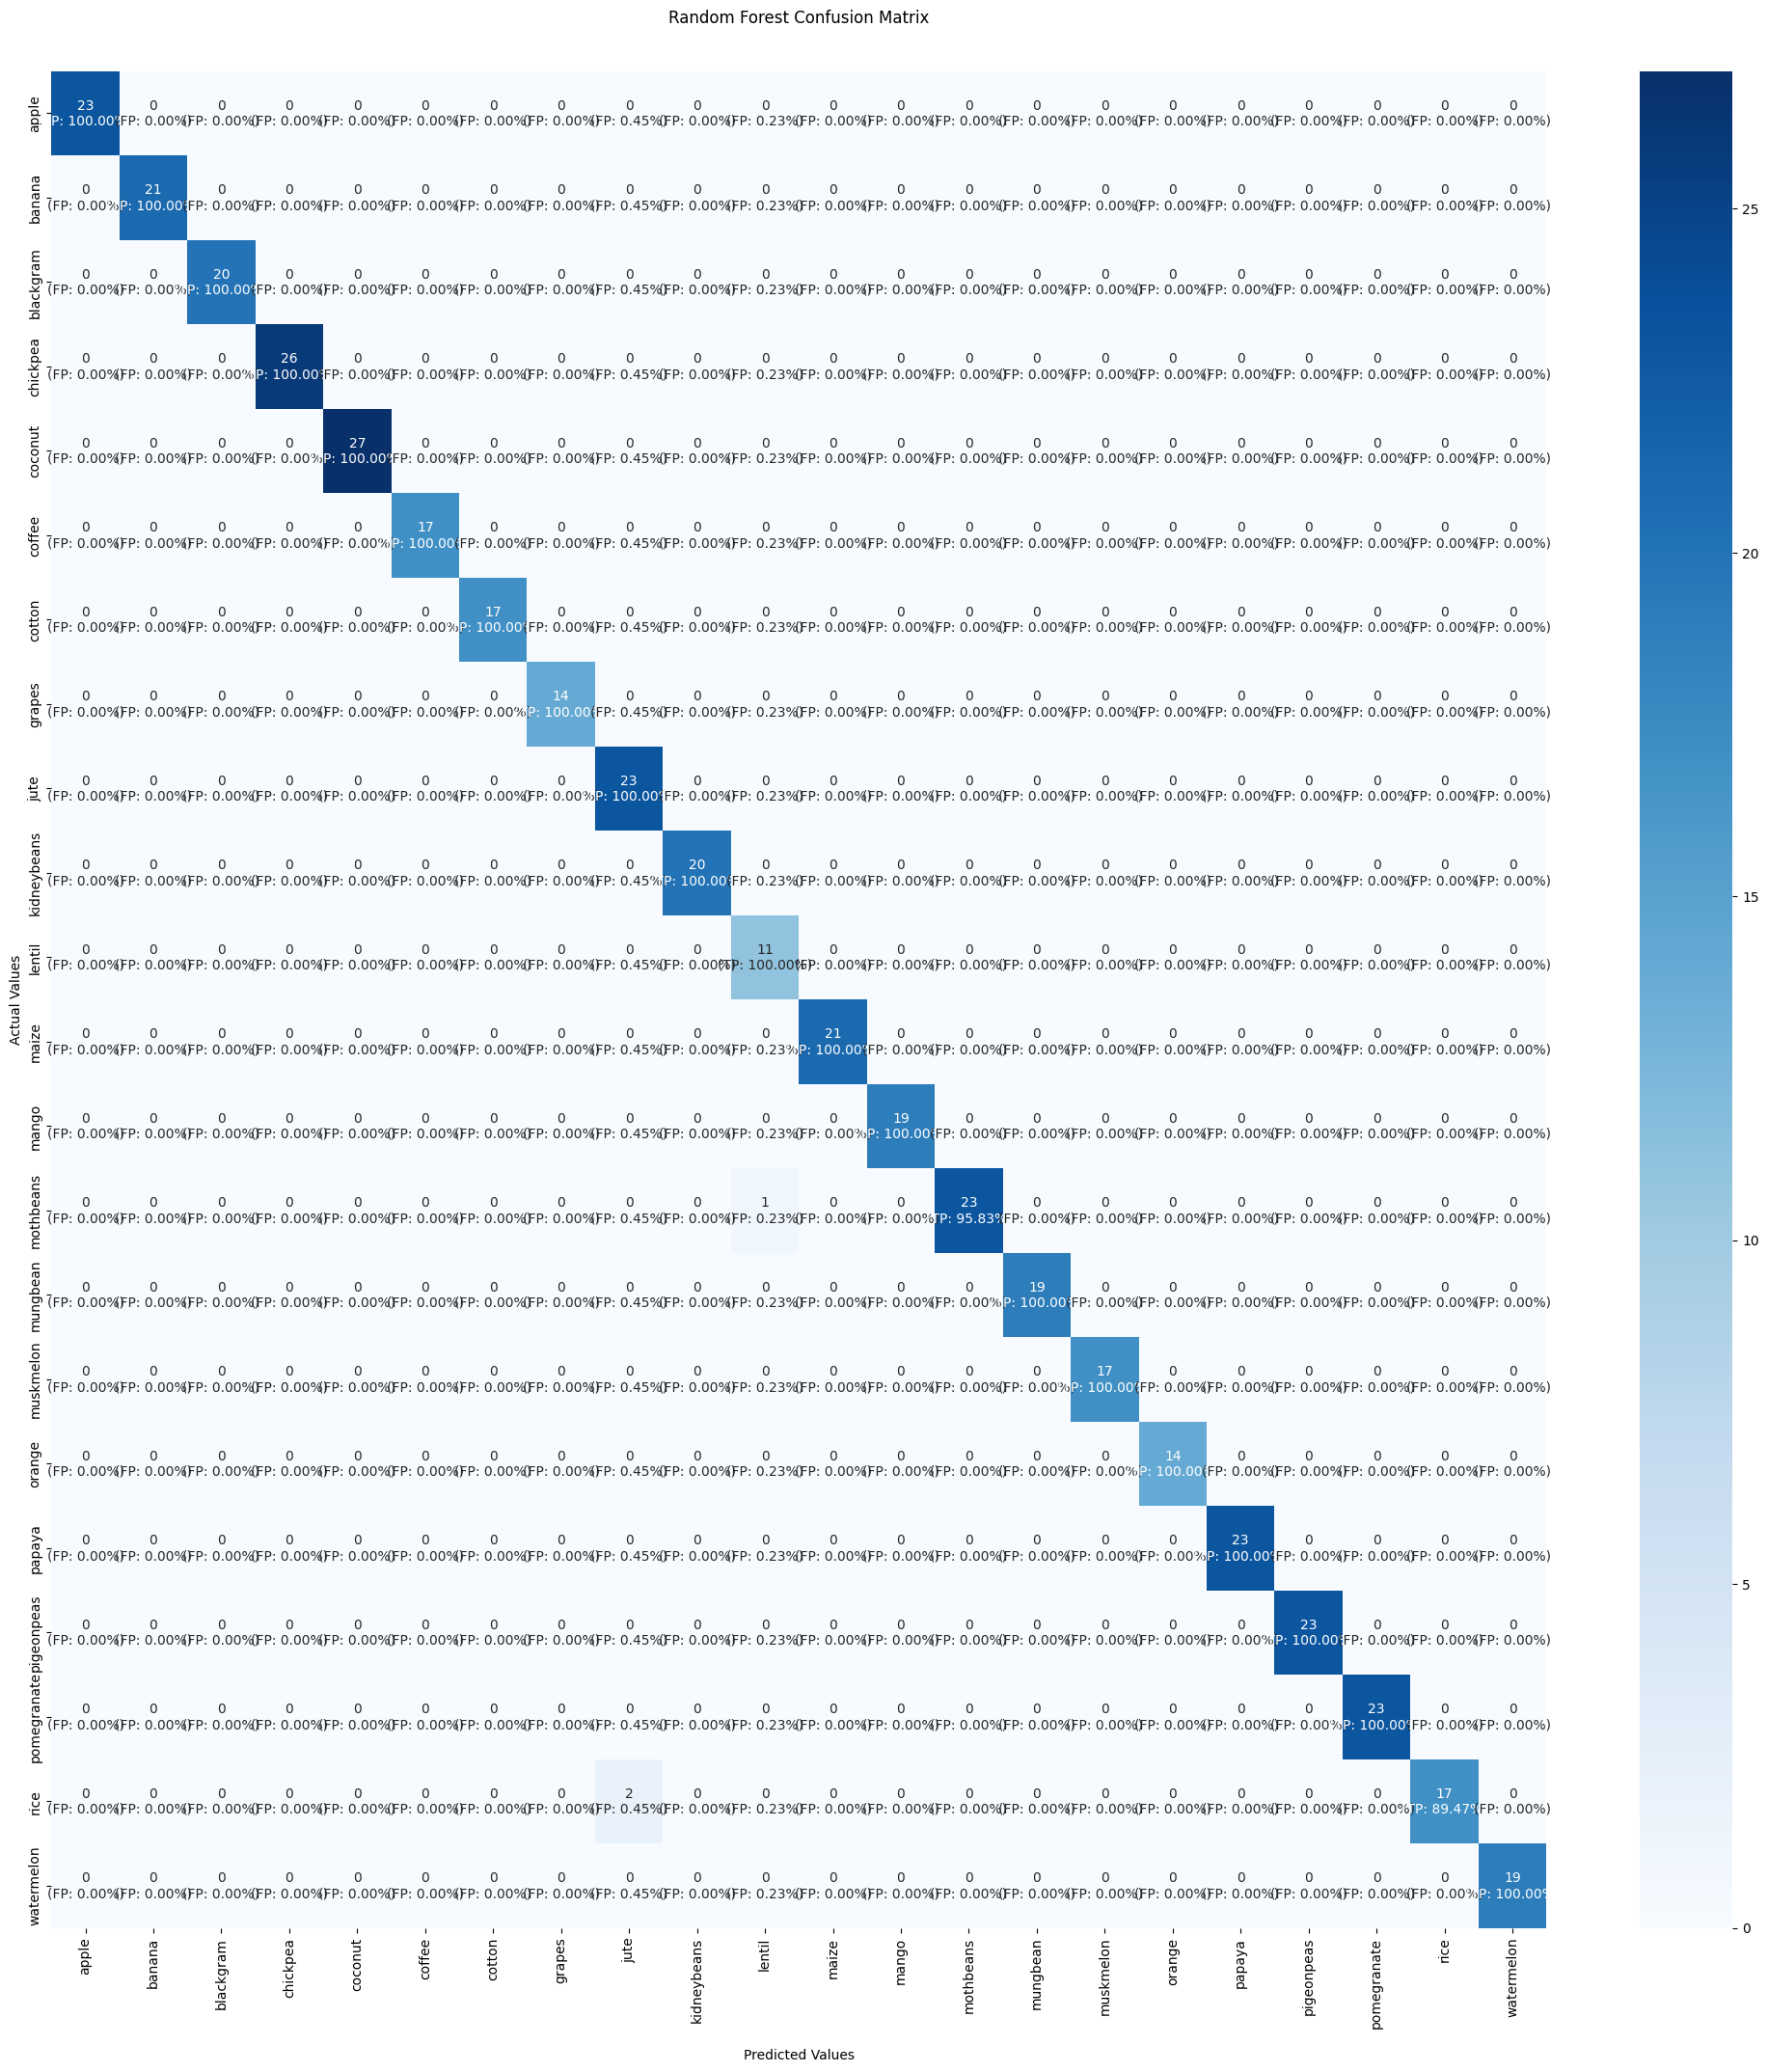


Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
  

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Assuming you want to use seaborn for heatmap visualization


def RandomForest_Train_Evaluate(X_train, X_test, y_train, y_test, 
                                n_estimators=100, 
                                criterion='gini', 
                                max_depth=None,
                                min_samples_leaf=1,
                                min_samples_split=2,
                                random_state=None):
 
    # Initialize the Random Forest model
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   criterion=criterion,
                                   max_depth=max_depth,
                                   min_samples_leaf=min_samples_leaf,
                                   min_samples_split=min_samples_split,
                                   random_state=random_state)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Create a DataFrame for the actual and predicted values
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    # Creating Confusion Matrix and visualization
    Confusion_Matrix_For_Multi_Class_With_Overview("Random Forest Confusion Matrix", y_test, y_pred)
    
    # Creating Classification Report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    return df, model


df, trained_RandomForest_model = RandomForest_Train_Evaluate(X_train, 
                                                             X_test, 
                                                             y_train, 
                                                             y_test, 
                                                             n_estimators=100,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                                             random_state=42)


# Step 9) Random Forest Hyperparameter Tuning

In [34]:
# import optuna
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# import pandas as pd


# # Suppress Optuna output
# optuna.logging.set_verbosity(optuna.logging.CRITICAL)


# # Objective function for Optuna
# def objective(trial):
#     # Define the hyperparameters to optimize
#     n_estimators = trial.suggest_categorical('n_estimators', [10, 50, 100, 200])
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     max_depth = trial.suggest_int('max_depth', 1, 14)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    
#     # Initialize the model with the suggested hyperparameters
#     rfc = RandomForestClassifier(
#         n_estimators=n_estimators,
#         criterion=criterion,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         n_jobs=-1  # Utilize all CPU cores
#     )
    
#     # Perform cross-validation
#     # Replace X_train and y_train with your training data
#     score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, verbose=0)
    
#     # Return the mean accuracy score
#     return score.mean()


# # Create a study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100, timeout=600, show_progress_bar=True)

# # Print the best parameters and the best score
# print("Best Parameters:", study.best_params)
# print("Best Score:", study.best_value)

# # Get the detailed study results
# df = study.trials_dataframe()
# df_sorted = df.sort_values('value', ascending=False)
# df_sorted.head()
